In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score, matthews_corrcoef, roc_curve, roc_auc_score, classification_report, confusion_matrix, balanced_accuracy_score, recall_score, precision_score, precision_recall_curve

In [47]:
df = pd.read_csv('/Users/felipesantos/Desktop/diabetes_binary_health_indicators_BRFSS2015.csv')

Diabetes_012: 0 = no diabetes 1 = prediabetes/diabetes
HighBP: 0 = no high BP, 1 = high BP
HighCol: 0 = no high cholesterol 1 = high cholesterol
CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
BMI: Body Mass Index
Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
HeartDiseasorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
0 = no 1 = yes
AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
NoDocbcost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
Menthealth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how 
many days during the past 30 days was your mental health not good? scale 1-30 days
PhysHlth: Now thinking about your physical health, which includes physical illness and injury, 
for how many days during the past 30 days was your physical health not good? scale 1-30 days
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
Sex: 0 = female 1 = male
Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary)
3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate)
5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
Income: income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more

In [48]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [77]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [65]:
# Preencher ou remover valores ausentes (exemplo de remoção)
df = df.dropna()

Número de casos de diabetes: 35346
Percentual de casos de diabetes: 13.93%


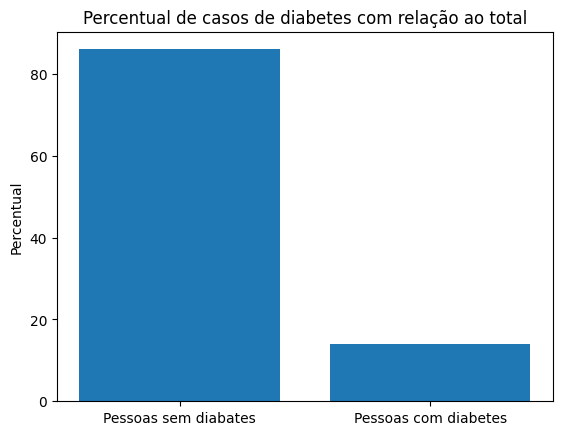

In [67]:
df_diabetes_cases = df[df['Diabetes_binary'] == 1]

num_diabetes_cases = df_diabetes_cases.shape[0]
print(f'Número de casos de diabetes: {num_diabetes_cases}')

# Contar o número total de registros
total_cases = df.shape[0]

# Calcular o percentual de casos de diabetes
percentual_diabetes = (num_diabetes_cases / total_cases) * 100
print(f'Percentual de casos de diabetes: {percentual_diabetes:.2f}%')

colunas = ['Pessoas sem diabates', 'Pessoas com diabetes']
percentuais = [100 - percentual_diabetes, percentual_diabetes]

plt.bar(colunas, percentuais)
plt.title("Percentual de casos de diabetes com relação ao total")
plt.ylabel("Percentual")
plt.show()

Sex
0.0    52.087931
1.0    47.912069
Name: Diabetes_binary, dtype: float64


Text(0, 0.5, 'Percentual (%)')

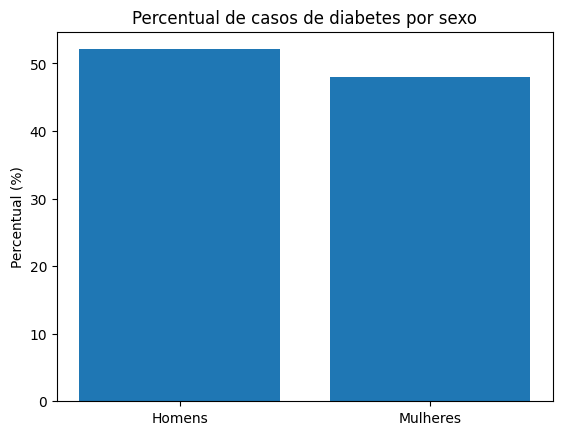

In [108]:
# Contar o número de casos de stroke para cada sexo
diabetes_by_sex = df.groupby('Sex')['Diabetes_binary'].sum()

# Contar o número total de casos de stroke
total_diabetes = df['Diabetes_binary'].sum()

# Calcular o percentual de casos de stroke para cada sexo
percent_diabetes_by_sex = (diabetes_by_sex / total_diabetes) * 100

print(percent_diabetes_by_sex)

plt.bar(['Homens', 'Mulheres'], percent_diabetes_by_sex)
plt.title('Percentual de casos de diabetes por sexo')
plt.ylabel('Percentual (%)')

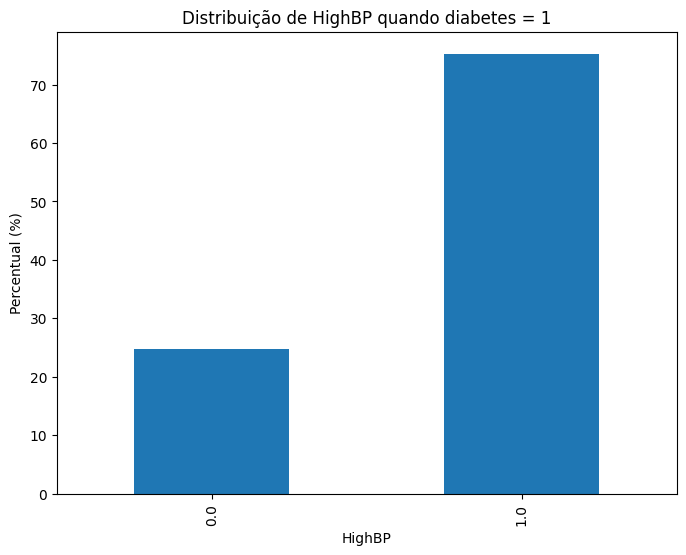

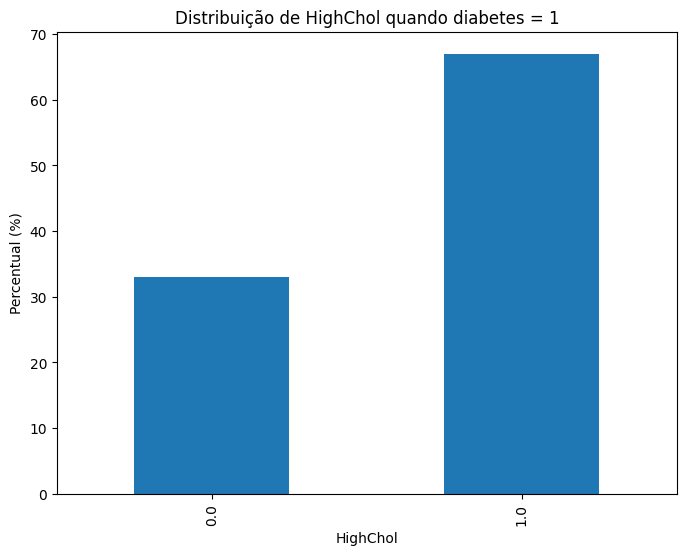

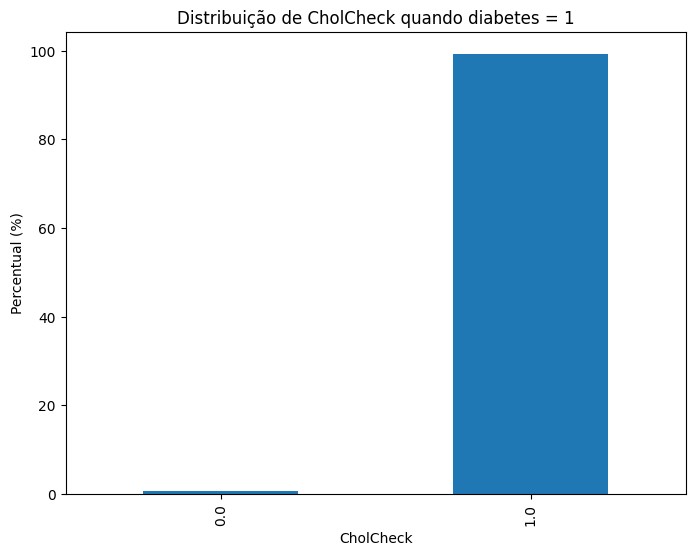

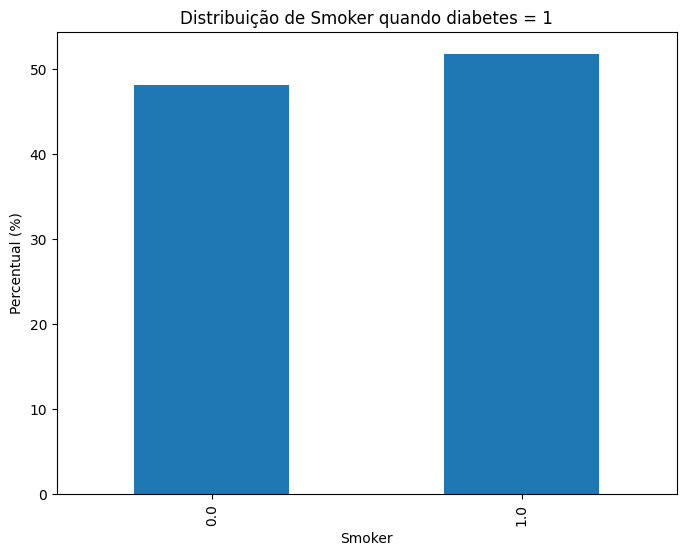

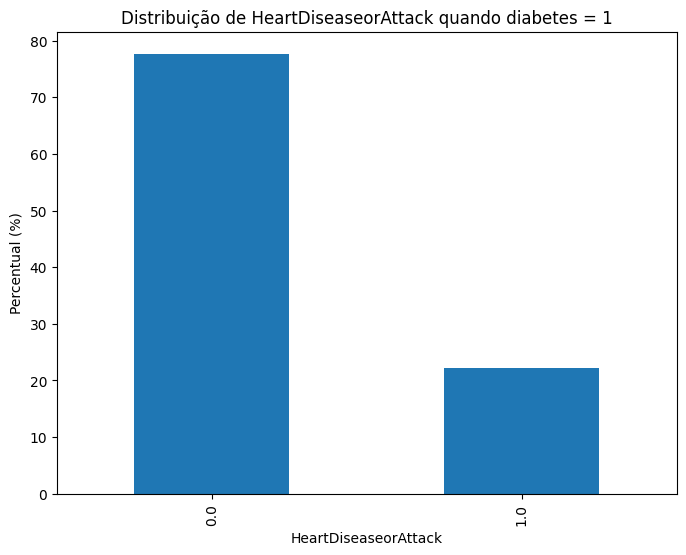

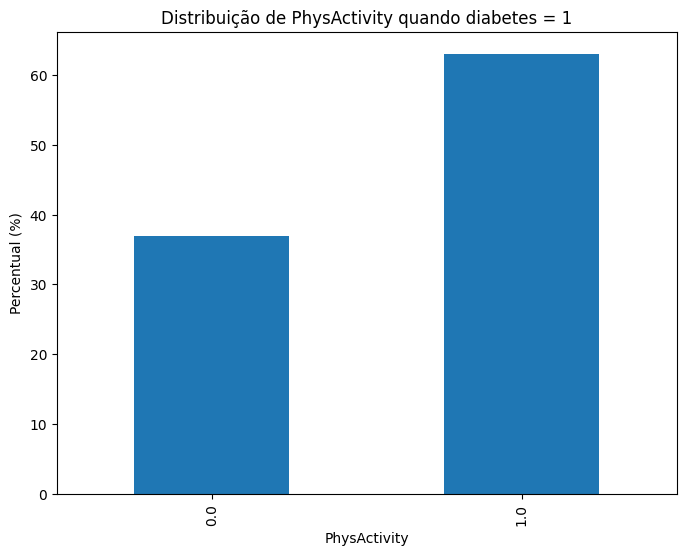

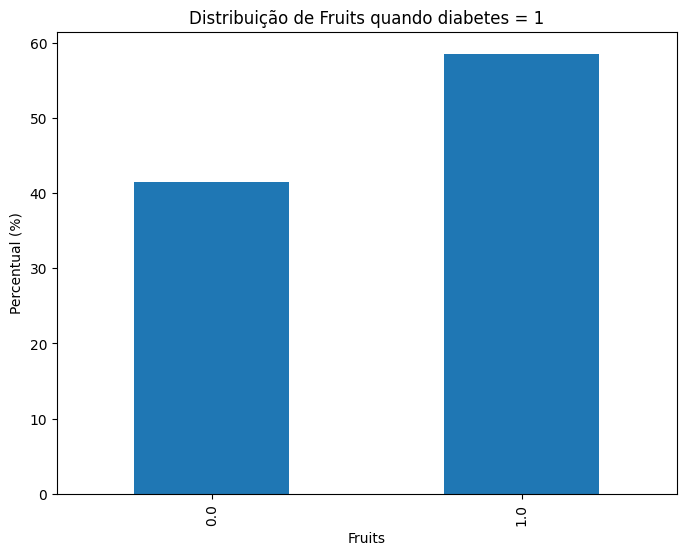

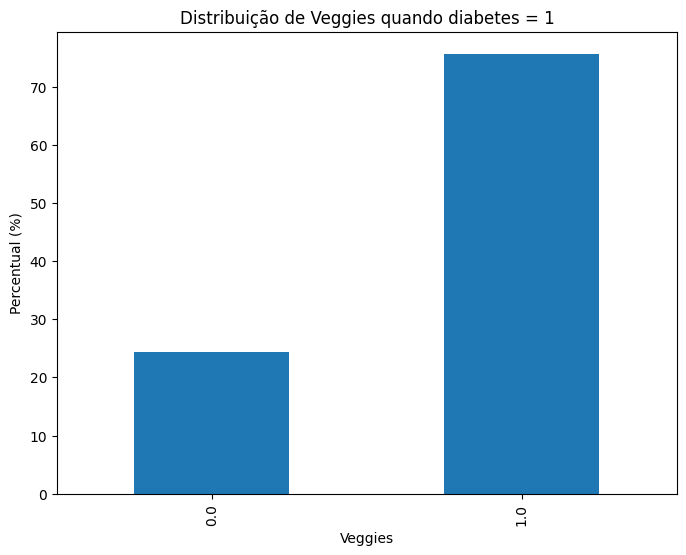

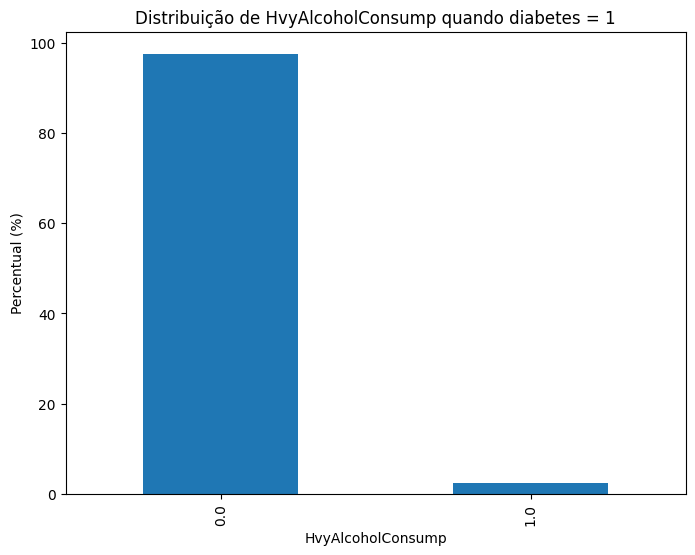

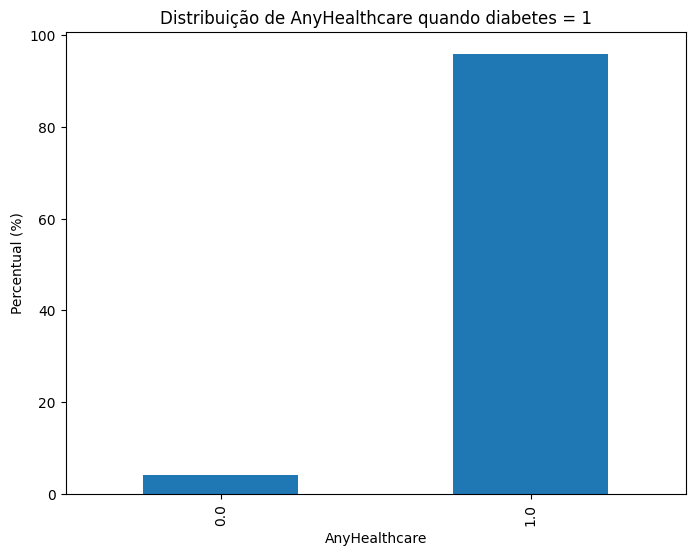

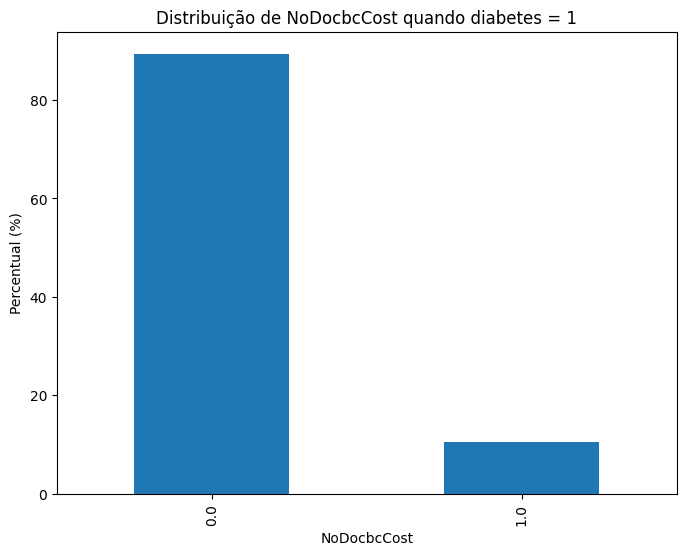

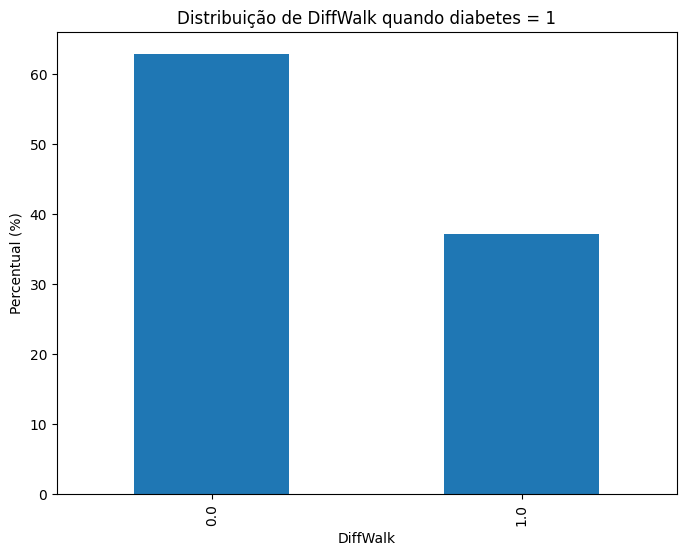

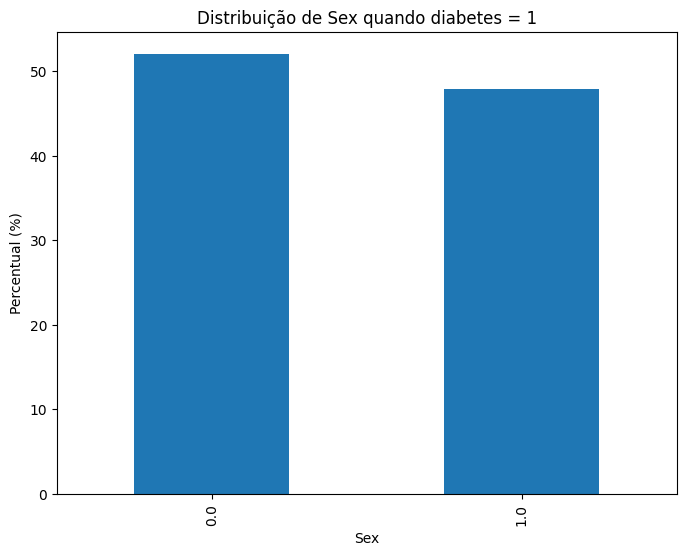

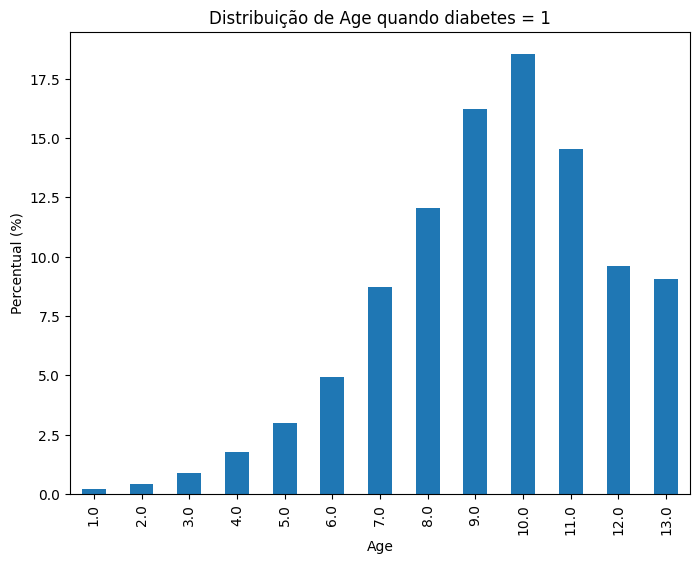

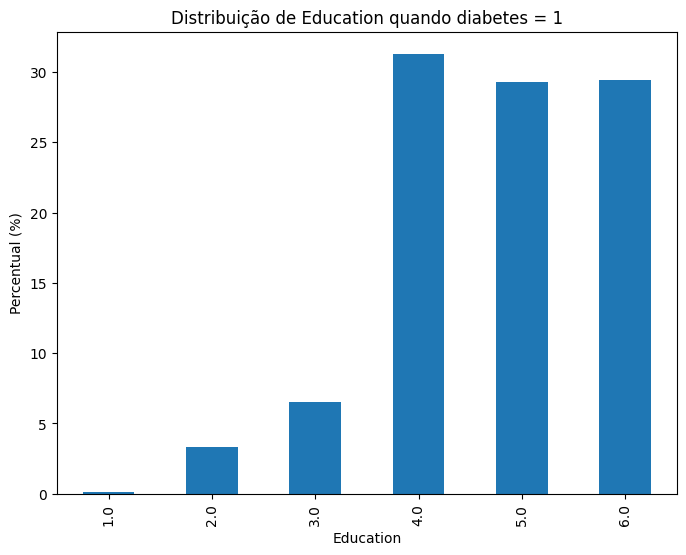

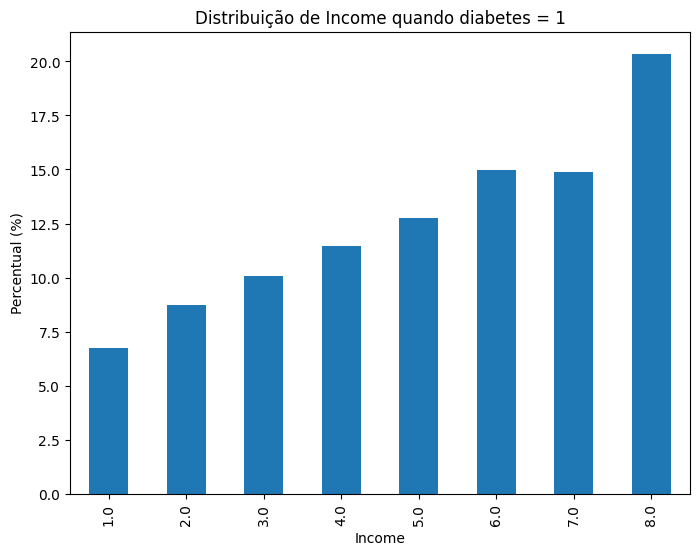

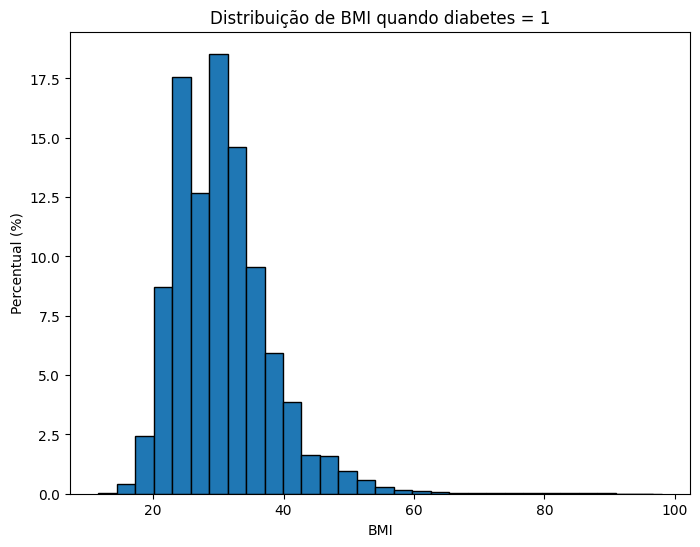

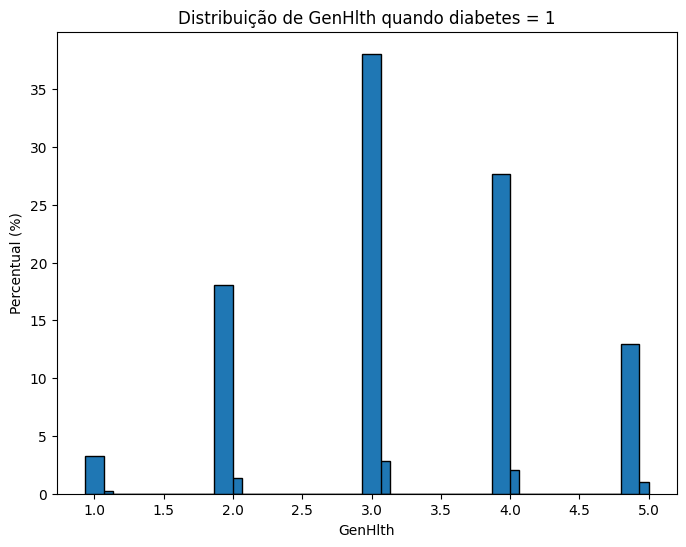

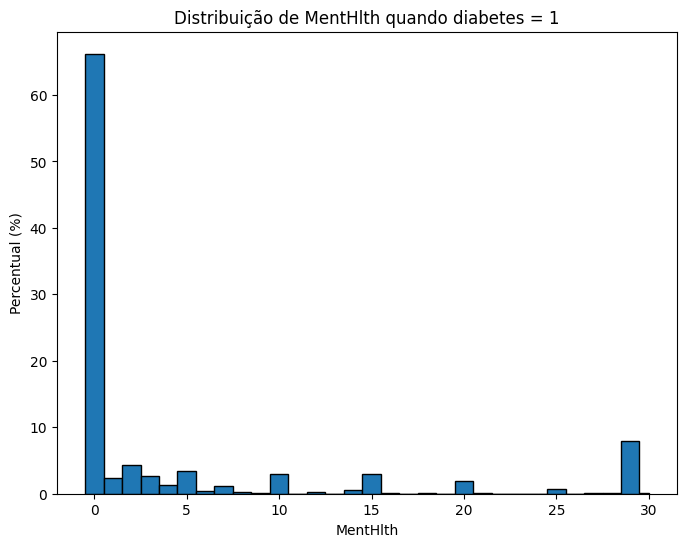

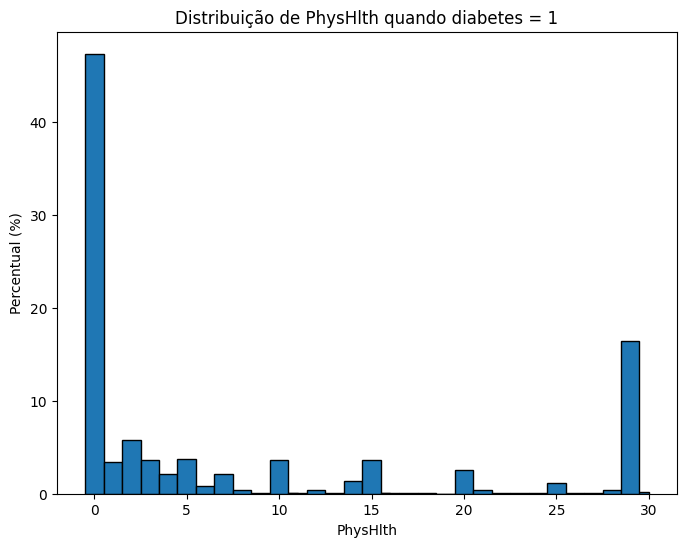

In [86]:
df_diabetes_cases = df[df['Diabetes_binary'] == 1]

# Lista de colunas categóricas
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Lista de colunas numéricas
numeric_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    value_counts = df_diabetes_cases[col].value_counts(normalize=True).sort_index() * 100  # Normaliza para obter percentual
    value_counts.plot(kind='bar')
    plt.title(f'Distribuição de {col} quando diabetes = 1')
    plt.xlabel(col)
    plt.ylabel('Percentual (%)')
    plt.show()

# Histogramas para variáveis numéricas
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    counts, bins, _ = plt.hist(df_diabetes_cases[col], bins=30, edgecolor='k', density=True)  # density=True para normalizar
    plt.title(f'Distribuição de {col} quando diabetes = 1')
    plt.xlabel(col)
    plt.ylabel('Percentual (%)')

    # Converte densidade para percentual
    bin_width = bins[1] - bins[0]
    percentages = counts * bin_width * 100
    plt.bar(bins[:-1], percentages, width=bin_width, edgecolor='k')

    plt.show()

In [107]:
amount_of_men = df[df['Sex'] == 1]
amount_of_women = df[df['Sex'] == 0]
women_with_d = (diabetes_by_sex[0] / amount_of_women.shape[0]) * 100
men_with_d = (diabetes_by_sex[1] / amount_of_men.shape[0]) * 100
print(f"Percentual de mulheres com diabetes com relação ao total de mulheres: {women_with_d:.2f}")
print(f"Percentual de homens com diabetes com relação ao total de homens: {men_with_d:.2f}")

Percentual de mulheres com diabetes com relação ao total de mulheres: 12.97
Percentual de homens com diabetes com relação ao total de homens: 15.16


In [113]:
percentual_de_mulheres = amount_of_women.shape[0] / (amount_of_men.shape[0] + amount_of_women.shape[0])
percentual_de_homens = amount_of_men.shape[0] / (amount_of_men.shape[0] + amount_of_women.shape[0])

In [115]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [116]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Separar features e target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Realizar o downsampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Inicializar os modelos
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Treinar os modelos
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [122]:
from sklearn.metrics import classification_report

# Fazer previsões
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Avaliar os modelos
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

Random Forest:
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10601
         1.0       0.72      0.77      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

Gradient Boosting:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     10601
         1.0       0.73      0.80      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score, matthews_corrcoef, roc_curve, roc_auc_score, classification_report, confusion_matrix, balanced_accuracy_score, recall_score, precision_score, precision_recall_curve

# Definição dos parâmetros para Grid Search
parameters_rf = {
    'classifier__n_estimators': (50, 100, 200), 
    'classifier__criterion': ('gini', 'entropy', 'log_loss'),
    'classifier__max_depth': (5, 10, 20, None),
    'classifier__max_features': ('sqrt', 'log2')
}

parameters_lr = {
    'classifier__penalty': ('l1', 'l2', 'elasticnet', 'none'),
    'classifier__C': (0.01, 0.1, 1, 10),
    'classifier__solver': ('liblinear', 'saga')
}

parameters_gb = {
    'classifier__n_estimators': (50, 100, 200), 
    'classifier__learning_rate': (0.01, 0.1, 0.2),
    'classifier__max_depth': (3, 5, 10)
}

# Inicialização dos classificadores e pipelines
classifiers = {
    'RandomForest': RandomForestClassifier(class_weight="balanced_subsample"),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight="balanced"),
    'GradientBoosting': GradientBoostingClassifier()
}

parameters = {
    'RandomForest': parameters_rf,
    'LogisticRegression': parameters_lr,
    'GradientBoosting': parameters_gb
}

results = {}

# Função para converter probabilidades em rótulos
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Loop de 100 iterações para cada classificador
for clf_name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    
    gridsearch = GridSearchCV(pipeline, parameters[clf_name], cv=5, n_jobs=8, scoring="f1", verbose=0)
    
    mccs, balan_accs, f1s, cms = [], [], [], []
    precisions, recalls = [], []
    tprs, fprs, aucs = [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i in tqdm(range(1, 101), desc=f'{clf_name}'):
        rus = RandomUnderSampler(sampling_strategy=1.0, random_state=416)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        gridsearch.fit(X_train, y_train)
        best_clf = gridsearch.best_estimator_.named_steps['classifier']
        y_pred_prob = best_clf.predict_proba(X_val)
        y_pred = to_labels(y_pred_prob, 0.5)[:, 1]
        mcc = matthews_corrcoef(y_val, y_pred)
        mccs.append(mcc)
        balan_acc = balanced_accuracy_score(y_val, y_pred)
        balan_accs.append(balan_acc)
        f1 = f1_score(y_val, y_pred)
        precisions.append(precision_score(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        f1s.append(f1)
        cms.append(confusion_matrix(y_val, y_pred))
        fpr, tpr, thresholds = precision_recall_curve(y_val, y_pred_prob[:, 1], pos_label=1, drop_intermediate=True)
        inter_tpr = np.interp(mean_fpr, fpr, tpr)
        tprs.append(inter_tpr)
        aucs.append(roc_auc_score(y_val, y_pred_prob[:, 1]))
    
    results[clf_name] = {
        'Balanced Accuracy': (np.mean(balan_accs), np.std(balan_accs)),
        'ROC-AUC': (np.mean(aucs), np.std(aucs)),
        'MCC': (np.mean(mccs), np.std(mccs)),
        'F1': (np.mean(f1s), np.std(f1s)),
        'Precision': (np.mean(precisions), np.std(precisions)),
        'Recall': (np.mean(recalls), np.std(recalls))
    }

# Exibição dos resultados das métricas para cada classificador
for clf_name, metrics in results.items():
    print(f"\n{clf_name} Results:")
    for metric_name, (mean, std) in metrics.items():
        print(f"{metric_name}: {mean:.4f} +- {std:.4f}")


RandomForest:   7%|█▊                       | 7/100 [55:54<12:08:40, 470.11s/it]